# K-means

In [3]:
# Imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
from matplotlib import pylab
from sklearn.cluster import KMeans 
from sklearn.decomposition import PCA 
from sklearn.model_selection import train_test_split 
from scipy.spatial.distance import cdist, pdist 
from sklearn.metrics import silhouette_score 
import warnings 
warnings.filterwarnings("ignore") 
%matplotlib inline

In [4]:
# Carregando dados e fazendo medidas para tratar grande volume de dados
dataset = pd.read_csv('household_power_consumption.txt', delimiter = ';', low_memory = False)

In [5]:
# Conhecendo os dados do dataset através da vizualização 
dataset.head()

,Date,Time,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,16/12/2006,17:24:00,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,16/12/2006,17:25:00,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,16/12/2006,17:26:00,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,16/12/2006,17:27:00,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,16/12/2006,17:28:00,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [8]:
# Informações gerais do dataset
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075259 entries, 0 to 2075258
Data columns (total 9 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Date                   object 
 1   Time                   object 
 2   Global_active_power    object 
 3   Global_reactive_power  object 
 4   Voltage                object 
 5   Global_intensity       object 
 6   Sub_metering_1         object 
 7   Sub_metering_2         object 
 8   Sub_metering_3         float64
dtypes: float64(1), object(8)
memory usage: 142.5+ MB


In [10]:
# Checando valores missing com um retorno de true para sim e false para nao.
dataset.isnull().values.any()

True

In [11]:
# Checando onde esses valores nulos estão
dataset.isnull().sum()

Date                         0
Time                         0
Global_active_power          0
Global_reactive_power        0
Voltage                      0
Global_intensity             0
Sub_metering_1               0
Sub_metering_2               0
Sub_metering_3           25979
dtype: int64

In [12]:
## PRÉ-PROCESSANDO DOS DADOS: TRABALHANDO COM OS DADOS APÓS ENTENDIMENTO DO DATASET

# Remove os registros com valores NA e remove as duas primeiras colunas que nao servirao para a análise que farei
dataset = dataset.iloc[0:, 2:9].dropna()
dataset.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,4.216,0.418,234.840,18.400,0.000,1.000,17.0
1,5.360,0.436,233.630,23.000,0.000,1.000,16.0
2,5.374,0.498,233.290,23.000,0.000,2.000,17.0
3,5.388,0.502,233.740,23.000,0.000,1.000,17.0
4,3.666,0.528,235.680,15.800,0.000,1.000,17.0


In [13]:
# Obtém os valores dos atributos. Obtém os valores de cada variável em um formato array.
dataset_atrib = dataset.values

In [14]:
# Imprimindo array (Variáveis de entrada X)
dataset_atrib

array([['4.216', '0.418', '234.840', ..., '0.000', '1.000', 17.0],
       ['5.360', '0.436', '233.630', ..., '0.000', '1.000', 16.0],
       ['5.374', '0.498', '233.290', ..., '0.000', '2.000', 17.0],
       ...,
       ['0.938', '0.000', '239.820', ..., '0.000', '0.000', 0.0],
       ['0.934', '0.000', '239.700', ..., '0.000', '0.000', 0.0],
       ['0.932', '0.000', '239.550', ..., '0.000', '0.000', 0.0]],
      dtype=object)

In [15]:
 # Coletando amostras de 1% do total dos meus dados para nao comprometer a memória do pc
dataset, amostra2 = train_test_split(dataset_atrib, train_size = .01)

In [18]:
# Checando a qtd de dados representante dos 1%
dataset.shape

(20492, 7)

## MÁQUINA PREDITIVA SEGMENTAÇÃO DE CLIENTE 
#### => Nessa etapa será efim iniciada as analises desejadas

Aqui usarei a CPA que é uma técnica de aprendizagem nao supervisionada utilizada para reduzir a dimensionalidade dos dados, e aqui usarei para reduzir a quantidade as variáveis.

O que irá acontecer?
- Transformamos as 7 variáveis em 2 variáveis (na verdade 2 componentes principais). O Importante é entender que a transformação foi realizada por meio de Matemática (Algebra), simples assim. O que aconteceu foi que juntamos as variáveis de acordo com sua semelhança entre si. Essa semelhança foi medida pela variância...


In [20]:
# Aplica redução de dimensionalidade no array das variáveis 
pca = PCA(n_components = 2).fit_transform(dataset)

In [24]:
# Criar um range de 12 elementos do Hyperparâmetro "K" do K-means (representando a qtd de grupos que quero)
# Garante uma avaliacao quantitativa de qtd de K ideal com base nos numeros de dados disposníveis
# Às vezes, o número de clusters é definido por requisitos de negócios ou a motivação para a análise.  
# A junção de uma avaliacao quantitativa com a qualitativa para melhor resultado

k_range = range(1,12)
k_range

range(1, 12)

In [27]:
# Aplicando o modelo K-Means para cada valor de K (esta célula pode levar bastante tempo para ser executada) 
# Criando 12 máquinas preditivas, cada uma com um valor de K diferente para escolher a melhor.
k_means_var = [KMeans(n_clusters = k).fit(pca) for k in k_range]

# Curva de Elbow
### Usarei esse conceito para me ajudar a calcular algumas medidas 

Text(0.5, 1.0, 'Variância Explicada para cada Valor de K')

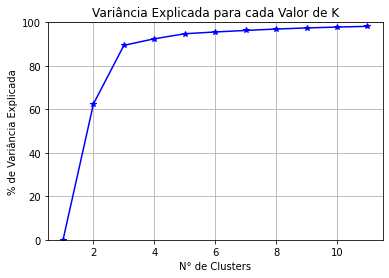

In [28]:
# Ajustando o centróide do cluster para cada modelo 
centroids = [X.cluster_centers_ for X in k_means_var] 
 
# Calculando a distância euclidiana de cada ponto de dado para o centróide 
k_euclid = [cdist(pca, cent, 'euclidean') for cent in centroids] 
dist = [np.min(ke, axis = 1) for ke in k_euclid] 
 
# Soma dos quadrados das distâncias dentro do cluster 
soma_quadrados_intra_cluster = [sum(d**2) for d in dist] 
 
# Soma total dos quadrados 
soma_total = sum(pdist(pca)**2)/pca.shape[0] 
 
# Soma dos quadrados entre clusters 
soma_quadrados_inter_cluster = soma_total - soma_quadrados_intra_cluster 
 
# Curva de Elbow (é nessa variancia do Elbow que descubro o melhor n° de clusters para minha predicoes)
fig = plt.figure() 
ax = fig.add_subplot(111) 
ax.plot(k_range, soma_quadrados_inter_cluster/soma_total * 100, 'b*-') 
ax.set_ylim((0,100)) 
plt.grid(True) 
plt.xlabel('N° de Clusters') 
plt.ylabel('% de Variância Explicada') 
plt.title('Variância Explicada para cada Valor de K')

### Escolhendo um valor de K inicial igual a 8 (com base no meu valor de variancia explicada) para avaliação da máquina preditiva


In [30]:
# Criando um modelo com K = 8 
modelo_v1 = KMeans(n_clusters = 8) 
modelo_v1.fit(pca)

KMeans()

## Avalição da máquina preditiva

#### > Avaliando a Máquina Preditiva V1 com k=8

In [31]:
# Avaliando a Máquina Preditiva V1 com k=8
# Obtém os valores mínimos e máximos e organiza o shape 
x_min, x_max = pca[:, 0].min() - 5, pca[:, 0].max() - 1 
y_min, y_max = pca[:, 1].min() + 1, pca[:, 1].max() + 5 
xx, yy = np.meshgrid(np.arange(x_min, x_max, .02), np.arange(y_min, y_max, .02)) 
Z = modelo_v1.predict(np.c_[xx.ravel(), yy.ravel()]) 
Z = Z.reshape(xx.shape)

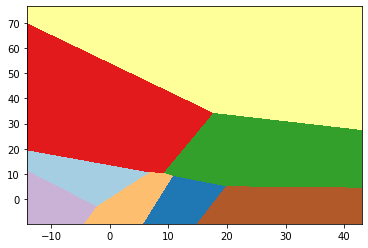

In [32]:
# Plot das áreas dos clusters (Visualizando meus agrupamentos)
plt.figure(1) 
plt.clf() 
plt.imshow(Z,  
           interpolation = 'nearest', 
           extent = (xx.min(), xx.max(), yy.min(), yy.max()), 
           cmap = plt.cm.Paired, 
           aspect = 'auto',  
           origin = 'lower')

In [35]:
# Métrica de avaliação para Clusterização (o n° de clusteres que melhor representará meus grupos necessários)
# O melhor valor é 1 e o pior valor é -1 
?silhouette_score



In [38]:
# Silhouette Score 

# Silhouette refere-se a um método de interpretação e validação de consistência dentro de agrupamentos de dados. 
# A técnica fornece uma representação gráfica sucinta de quão bem cada objeto foi classificado.

labels = modelo_v1.labels_ 
silhouette_score(pca, labels, metric = 'euclidean')

0.6565589986206574

#### > Avaliando a Máquina Preditiva V2 com k=9

In [39]:
# Criando um modelo com K = 9 
modelo_v2 = KMeans(n_clusters = 9) 
modelo_v2.fit(pca)

KMeans(n_clusters=9)

In [40]:
# Silhouette Score 
labels = modelo_v2.labels_ 
silhouette_score(pca, labels, metric = 'euclidean')

0.6263789310614061

#### > Avaliando a Máquina Preditiva V3 com K=10


In [41]:
# Criando um modelo com K = 10 
modelo_v2 = KMeans(n_clusters = 10) 
modelo_v2.fit(pca)

KMeans(n_clusters=10)

In [42]:
# Silhouette Score 
labels = modelo_v2.labels_ 
silhouette_score(pca, labels, metric = 'euclidean')

0.6161117511263637

## Usando a Marcação dos Clusters da Máquina Preditiva Final

In [43]:
# Lista com nomes das colunas 
names = ['Global_active_power', 'Global_reactive_power', 'Voltage', 'Global_intensity', 'Sub_metering_1', 'Sub_metering_2', 'Sub_metering_3']

In [44]:
# Incluindo o n° do cluster na base de clientes 
cluster_map = pd.DataFrame(dataset, columns = names) 
cluster_map['Global_active_power'] = pd.to_numeric(cluster_map['Global_active_power']) 
cluster_map['cluster'] = modelo_v1.labels_

In [45]:
cluster_map

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,cluster
0,1.814,0.000,245.390,7.400,0.000,0.000,19.0,1
1,0.152,0.000,238.600,0.600,0.000,0.000,1.0,5
2,1.744,0.080,246.320,7.200,0.000,0.000,18.0,1
3,3.528,0.112,239.800,14.600,0.000,37.000,19.0,2
4,0.246,0.052,240.950,1.000,0.000,0.000,0.0,5
...,...,...,...,...,...,...,...,...
20487,0.248,0.220,241.060,1.400,0.000,1.000,0.0,5
20488,3.164,0.134,238.330,14.200,0.000,20.000,18.0,2
20489,0.308,0.056,244.770,1.200,0.000,2.000,0.0,5
20490,3.442,0.050,230.730,14.800,0.000,36.000,0.0,3


In [46]:
# Calcula a média de consumo de energia por cluster para interpretar meu grupo, nao dados isolados 
cluster_map.groupby('cluster')['Global_active_power'].mean()

cluster
0    1.442104
1    1.812662
2    4.010993
3    2.945311
4    1.072735
5    0.363244
6    6.191909
7    2.421344
Name: Global_active_power, dtype: float64

# <font color='green'>Conclusão Final </font>

### Essa analise me permitiu identificar os 8 principais grupos de consumidores e a partir do seu consumo de energia, e esses dados podem trazem insigths gigantes para a empresa, pois a partir dessa anlálise podem surgir questionamentos hipoteses como: já que o Cluster 6 é o maior consomidor e isso pode representar diversas questionamentos, como: "Será que esse grupo tem uma maior quantidade de eletrodomestico?" e esse questionamento pode nos levar a outros pré supostos, como por exemplo: "será esse grupo tem mais eletrodomésticos, certamente tem um maior poder aquisitivo". 
### Ou se por acaso queira se analisar porquê o cluster 5 o consumo é tão mais abaixo da médica comparado aos outro,"será que essa parcela representa grupos de familias compostas por pessoas que nao tem filhos e passa o dia fora de casa trabalhando". 
### Ou até "será que se dar pelo fato de terem problema com distribuicao de energia?" ...e assim por diante. 
### Veja que com esses dados de consumo gerados apartir dos clusters de clientes é possível descobrir muito mais sobre os grupos de clientes, podendo se fazer de fato uma análises estratégica baseadas em dados que traga grande valor de negócio para o negócio.